In [74]:
import pandas as pd

data = pd.read_excel("option test.xlsx")
df = data.iloc[:, [2,3,4,5,-3,-2,-1]]

# ======================================
dfOpen = df['開盤價']
dfClose = df['收盤價']
dfHigh = df['最高價']
dfLow = df['最低價']
dfVolume = df['成交量']
dfK = df['K(9,3)']
dfD = df['D(9,3)']
# ======================================
df.head()

,開盤價,最高價,最低價,收盤價,成交量,"K(9,3)","D(9,3)"
0,15437,15437,15422,15429,1222,0.6350,0.7391
1,15428,15431,15417,15425,1311,0.6351,0.7044
2,15426,15439,15426,15436,759,0.6734,0.6941
3,15436,15445,15427,15436,1350,0.6190,0.6691
4,15435,15474,15428,15461,4660,0.6772,0.6718


In [24]:
# mean, median
import numpy as np
from scipy import stats

print('#===========================')
value1 = np.mean(dfOpen)
value2 = np.median(dfOpen)
print("Open Mean:", value1)
print("Open Median:", value1)
print('#===========================')

value3 = np.mean(dfClose)
value4 = np.median(dfClose)
print("Close Mean:", value3)
print("Close Median:", value4)
print('#===========================')

value5 = np.mean(dfHigh)
value6 = np.median(dfHigh)
print("High Mean:", value5)
print("High Median:", value6)
print('#===========================')

value7 = np.mean(dfLow)
value8 = np.median(dfLow)
print("Low Mean:", value7)
print("Low Median:", value8)
print('#===========================')

value9 = np.mean(dfVolume)
value10 = np.median(dfVolume)
print("Volume Mean:", value9)
print("Volume Median:", value10)


#===========================
Open Mean: 15462.920454545454
Open Median: 15462.920454545454
#===========================
Close Mean: 15463.022727272728
Close Median: 15442.0
#===========================
High Mean: 15484.40909090909
High Median: 15470.0
#===========================
Low Mean: 15440.681818181818
Low Median: 15428.5
#===========================
Volume Mean: 6245.022727272727
Volume Median: 3388.5


In [25]:
# Standard Deviation
import numpy as np

a = np.std(dfOpen)
b = np.std(dfClose)
c = np.std(dfHigh)
d = np.std(dfLow)
e = np.std(dfVolume)

print(a, b, c, d, e)

114.12196641302326 113.99591073932983 113.69063249606528 112.49015567580544 6119.30277329874


In [28]:
# Percentile
import numpy as np

a = np.percentile(dfOpen,50)
b = np.percentile(dfClose,50)
c = np.percentile(dfHigh,50)
d = np.percentile(dfLow,50)
e = np.percentile(dfVolume,50)

print(a, b, c, d, e)

15447.0 15442.0 15470.0 15428.5 3388.5


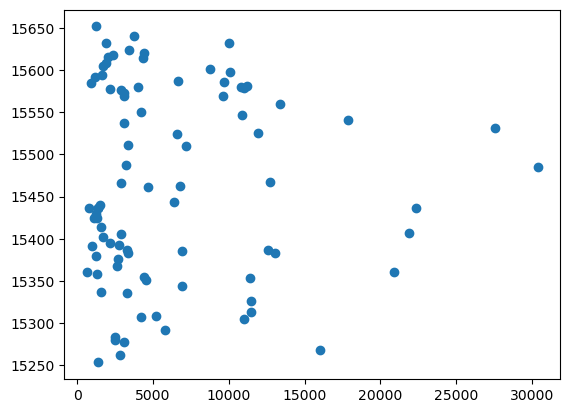

In [35]:
import matplotlib.pyplot as plt

x = dfVolume
y = dfClose

plt.scatter(x, y)
plt.show()

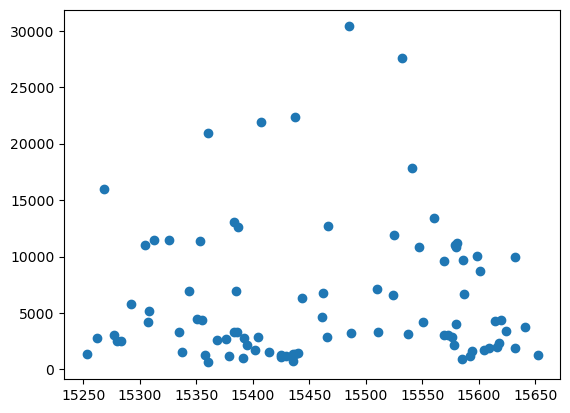

In [36]:
import matplotlib.pyplot as plt

x = dfClose
y = dfVolume

plt.scatter(x, y)
plt.show()

0.0659564969756109
9


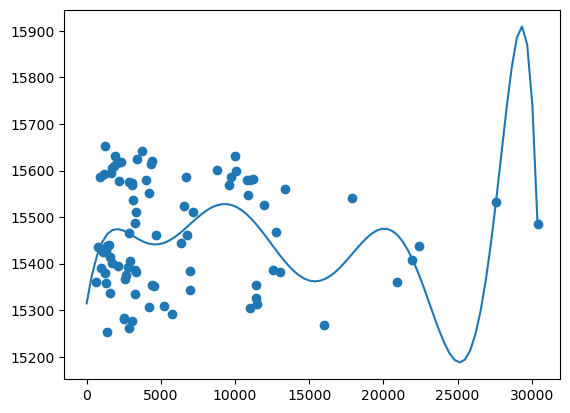

In [70]:
# Polynomial Regression

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x = dfVolume
y = dfClose
z = len(dfVolume)
o = max(dfVolume)

# Find Best Coefficient ======================================
highScore = []
for i in range(0,10):
    mymodel_HighScore = np.poly1d(np.polyfit(x, y, i))
    getPoint = r2_score(y, mymodel_HighScore(x))
    highScore.append(getPoint)

list_a_max_list = max(highScore) #返回最大值
max_index = highScore.index(max(highScore)) # 返回最大值的索引 
print(list_a_max_list)
print(max_index)
# ===========================================================

mymodel = np.poly1d(np.polyfit(x, y, max_index))
myline = np.linspace(1,o,z)

plt.scatter(x,y)
plt.plot(myline,mymodel(myline))
plt.show()

## Multiple Regression

In [1]:
import pandas as pd

data = pd.read_excel("option20230207.xlsx")
df = data.iloc[:, [2,3,4,5,-3,-2,-1]]

df.head()

,開盤價,最高價,最低價,收盤價,成交量,"K(9,3)","D(9,3)"
0,14471,14541,14411,14532,28036,0.3271,0.2053
1,14530,14550,14503,14521,13735,0.4833,0.2980
2,14522,14529,14476,14483,9132,0.4983,0.3647
3,14482,14490,14436,14461,21187,0.4566,0.3954
4,14485,14512,14457,14457,5175,0.4194,0.4034


In [3]:
import pandas as pd

data = pd.read_excel("option20230208.xlsx")
df = data.iloc[:, [2,3,4,5,-3,-2,-1]]

X = df[['最低價','K(9,3)']]
Z = df[['最高價','K(9,3)']]
y = df['收盤價']

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)
regr2 = linear_model.LinearRegression()
regr2.fit(Z,y)


k = int(input('請輸入K值'))
k = k/10000
# 最高價
value2 = input('請輸入最高價')
# 最低價
value1 = input('請輸入最低價')


predictedClose = regr.predict([[value2, k]])
predictedClose2 = regr.predict([[value1, k]])
print(predictedClose)
print(predictedClose2)
# print(regr.coef_)


[15632.79550815]
[15603.79097379]


c:\Users\PAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\PAN\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
c:\Users\PAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\PAN\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly in

In [30]:
X = df[['開盤價','收盤價']]
y = df['最高價']

from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X,y)

# 開盤價
value1 = input()
# 收盤價
value2 = input()
predictedClose = regr.predict([[value1, value2]])
print(predictedClose)
# print(regr.coef_)


[15413.30611635]


c:\Users\PAN\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\PAN\anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
